# Liver Disease Prediction | Dataset exploration 

## 1. Load the dataset

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [27]:
df=pd.read_csv(r"C:\Users\rakes\health_proj\Liver Disease Prediction\Dataset\indian_liver_patient.csv")

## 2. Explore and get the labels of the dataset

In [28]:
df.shape

(583, 11)

In [29]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [30]:
df.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [31]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

### Statistical details like mean, meadain and x percentiles of the labels

In [32]:
display(df.describe())

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


## 3.Finiding NULL valur and performing imputation and changes as required

In [33]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

feature Albumin_and_Globulin_Ratio have 4 null values which should to filled for furthing finding for correlations and other insights. <br />
->so here i am using mean method to impute the values in place of null values as only few values are null so default function will work

In [34]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean')
imputer.fit(df[['Albumin_and_Globulin_Ratio']])
df['Albumin_and_Globulin_Ratio']=imputer.transform(df[['Albumin_and_Globulin_Ratio']])

In [35]:
#to get the data type of each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In above we can see that Gender is not a numeric type so we convert it numeric for further analysis <br />
-> Gender: 1-male and 0-female

In [36]:
df['Gender']=df['Gender'].replace({'Male':1,'Female':0})

# 4. EDA
-> Check the distribution of the columns like gender and target class(dataset)<br />
-> Perfoming multivariant analysis on all parameters and drawing conclusions from them<br />
-> explore the correlation matrix<br />
-> Overall Insights<br />

### ->Check for Distribution

In [37]:
# target class distribution in data set, 1 represent its a liver patient and 2 represent it is not a liver patient
true_count=len(df.loc[df['Dataset']==1])
false_count=len(df.loc[df['Dataset']==2])
print(true_count,false_count)

416 167


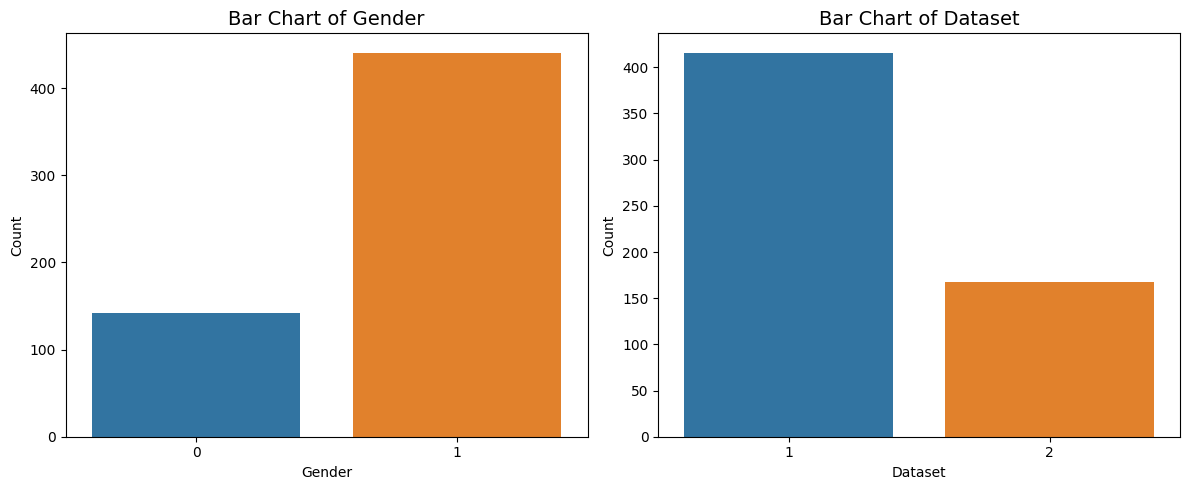

In [38]:
#bar chart for the target class (which is dataset here) and gender to visualize its distriubtion
categorical_vars = ['Gender', 'Dataset']
plt.figure(figsize=(12, 5))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(1, 2, i)
    sns.countplot(x=var, data=df)
    plt.title(f'Bar Chart of {var}', fontsize=14)
    plt.xlabel(var)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

### ->Mulitvariant analysis on Features

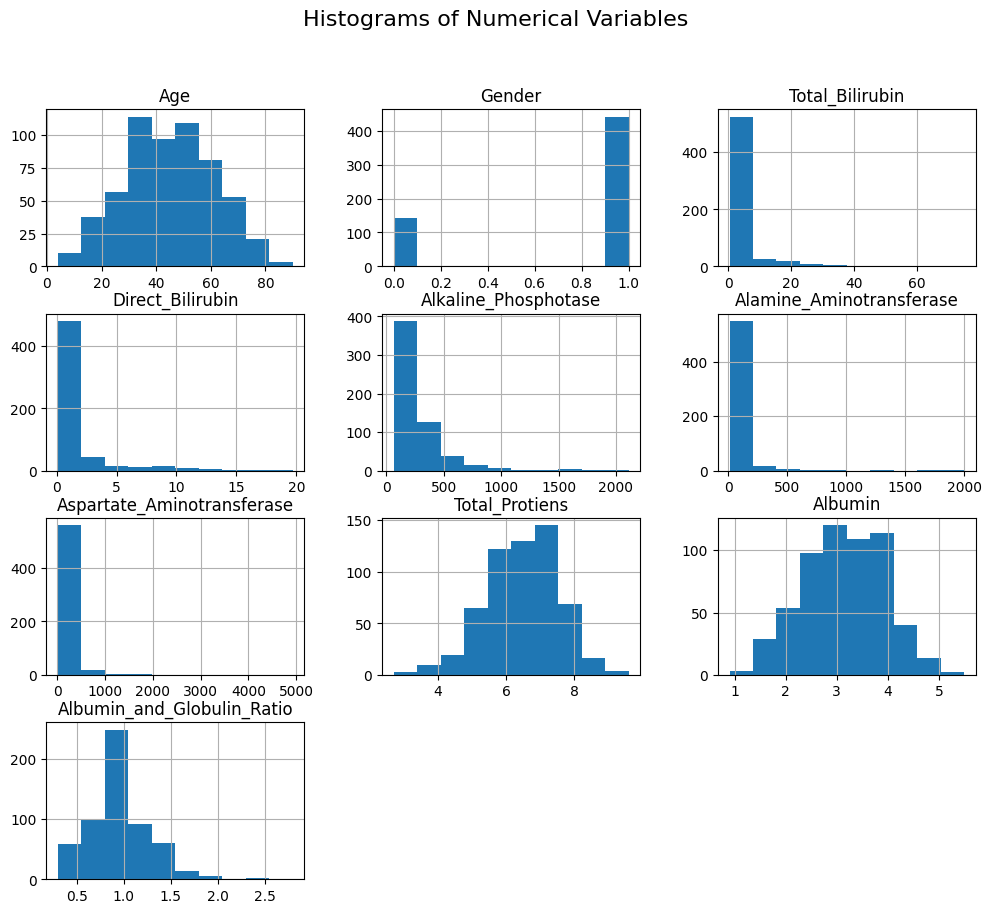

In [39]:
numerical_vars = ['Age', 'Gender','Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 
                  'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 
                  'Albumin', 'Albumin_and_Globulin_Ratio']
df[numerical_vars].hist(figsize=(12, 10))
plt.suptitle('Histograms of Numerical Variables', fontsize=16)
plt.show()

Analysis of the histogram:<br />
-> Age: The graph shows that most of the people age is between 30 to 70 in the dataset<br />
-> Gender: Gender is only 0 (for female) and 1 (for male) also indicates that male dominant data is present in the dataset<br />
-> Total Billirubin: around 500 people in the dataset have total billirubin between 0 to 10 in their blood<br />
-> Direct Billirubin: Direct billirubin which is processed by liver, in the dataset around 450 people have direct billirubin between 0 to 2 in their blood.
-> Alkaline phosphotase(ALP):Few people in dataset have high elevated ALP enzyme which indicates liver disorders<br />
-> Alanine Aminotransferase(ALT): This enzyme which convert alanine and amino acid into pyruvate but high level of this causes damages to liver and result int fatty liver disease. In dataset very few have high level ALT.<br />
-> Aspartate Aminotransferase(AST): High AST causes hepatitis, few have high level AST in the dataset.<br />
-> Total Protien: This indicates total amount of albumin and globulin in the blood, its low levels (less than 6g) indicates liver disease. Around 60 people in the dataset have it bewtween 5-6 gm and some have even less than this.<br />
-> Albumin: Main protien made by the liver, low levels(less than 3.5) indicate chronic liver disease. Around 100 people have low level of albumin the dataset.<br />
-> A/G ratio: low ratio signifise liver disease, in dataset around 50 have this ratio less than 0.5.

### -> Explore the Correaltion matrix

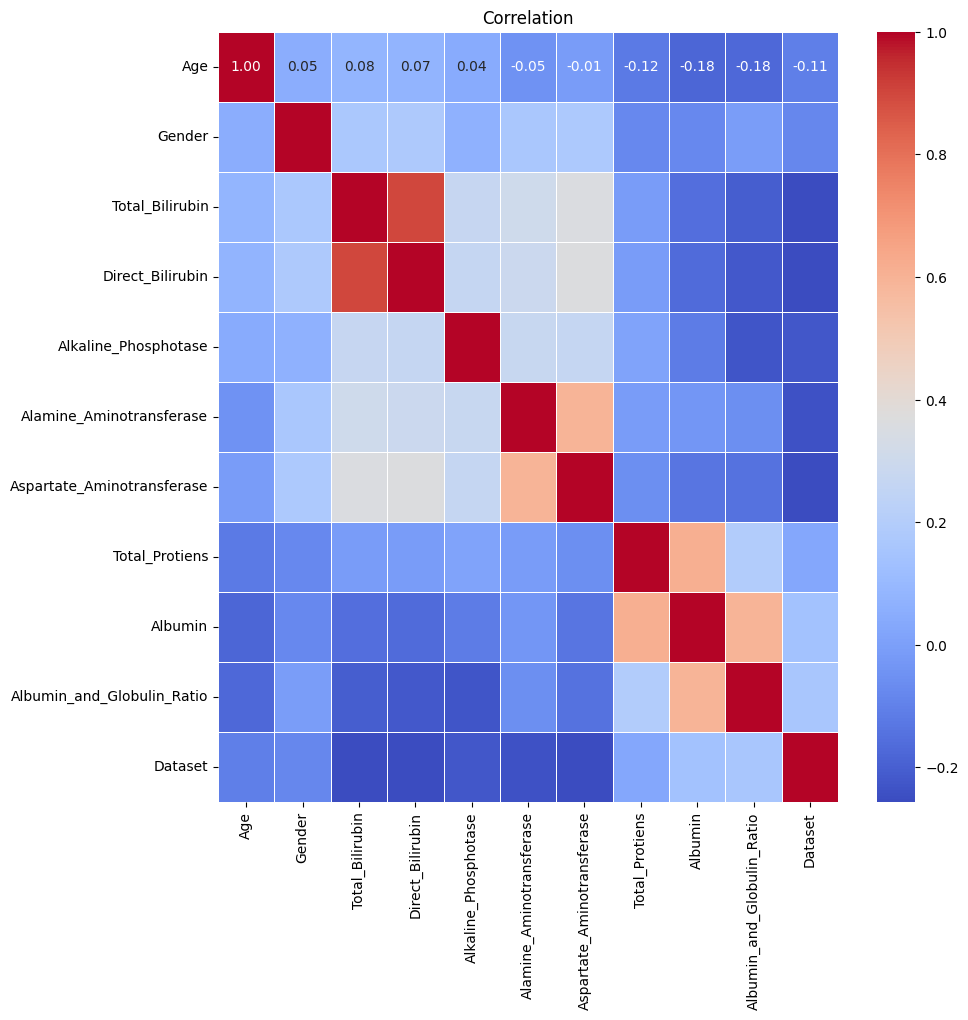

In [40]:
corr=df.corr(method='kendall')
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt=".2f",linewidth=.5)
plt.title("Correlation")
plt.show()

the exact correaltion value is not visible in the heatmap so going to print the whole matrix and derive something from there.<br />
Correlation with respect to different methods can be derived, correlation methods like pearson, spearman, kendall will be used here

In [41]:
df.corr(method='pearson')

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216089,-0.137351
Gender,0.056560,1.000000,0.089291,0.100436,-0.027496,0.082332,0.080336,-0.089121,-0.093799,-0.003404,-0.082416
Total_Bilirubin,0.011763,0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206159,-0.220208
Direct_Bilirubin,0.007529,0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200004,-0.246046
Alkaline_Phosphotase,0.080425,-0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233960,-0.184866
Alamine_Aminotransferase,-0.086883,0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002374,-0.163416
Aspartate_Aminotransferase,-0.019910,0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070024,-0.151934
Total_Protiens,-0.187461,-0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233904,0.035008
Albumin,-0.265924,-0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686322,0.161388
Albumin_and_Globulin_Ratio,-0.216089,-0.003404,-0.206159,-0.200004,-0.233960,-0.002374,-0.070024,0.233904,0.686322,1.000000,0.162319


In [42]:
df.corr(method='spearman')

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.062364,0.113827,0.106473,0.059205,-0.067737,-0.018285,-0.174271,-0.260791,-0.249505,-0.129572
Gender,0.062364,1.000000,0.200503,0.209210,0.079131,0.201107,0.209434,-0.090905,-0.095440,-0.008342,-0.082416
Total_Bilirubin,0.113827,0.200503,1.000000,0.959216,0.383794,0.436586,0.508869,-0.019252,-0.222184,-0.284200,-0.303879
Direct_Bilirubin,0.106473,0.209210,0.959216,1.000000,0.367818,0.412322,0.504138,-0.019987,-0.232664,-0.297338,-0.297270
Alkaline_Phosphotase,0.059205,0.079131,0.383794,0.367818,1.000000,0.410752,0.395732,0.014028,-0.170809,-0.321095,-0.273247
Alamine_Aminotransferase,-0.067737,0.201107,0.436586,0.412322,0.410752,1.000000,0.773611,-0.018811,-0.052673,-0.082942,-0.290709
Aspartate_Aminotransferase,-0.018285,0.209434,0.508869,0.504138,0.395732,0.773611,1.000000,-0.084779,-0.204867,-0.208809,-0.308897
Total_Protiens,-0.174271,-0.090905,-0.019252,-0.019987,0.014028,-0.018811,-0.084779,1.000000,0.779077,0.272490,0.032220
Albumin,-0.260791,-0.095440,-0.222184,-0.232664,-0.170809,-0.052673,-0.204867,0.779077,1.000000,0.751223,0.167079
Albumin_and_Globulin_Ratio,-0.249505,-0.008342,-0.284200,-0.297338,-0.321095,-0.082942,-0.208809,0.272490,0.751223,1.000000,0.187377


In [43]:
df.corr(method='kendall')

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.051520,0.078099,0.074733,0.038868,-0.046261,-0.013206,-0.120690,-0.180176,-0.177241,-0.107040
Gender,0.051520,1.000000,0.168671,0.180362,0.064846,0.165521,0.172013,-0.075289,-0.079378,-0.007077,-0.082416
Total_Bilirubin,0.078099,0.168671,1.000000,0.898136,0.270267,0.306483,0.361626,-0.014417,-0.153281,-0.203865,-0.255635
Direct_Bilirubin,0.074733,0.180362,0.898136,1.000000,0.265809,0.292416,0.364823,-0.015559,-0.164638,-0.219255,-0.256279
Alkaline_Phosphotase,0.038868,0.064846,0.270267,0.265809,1.000000,0.277939,0.264168,0.010076,-0.115934,-0.227519,-0.223921
Alamine_Aminotransferase,-0.046261,0.165521,0.306483,0.292416,0.277939,1.000000,0.596488,-0.012909,-0.033134,-0.055798,-0.239269
Aspartate_Aminotransferase,-0.013206,0.172013,0.361626,0.364823,0.264168,0.596488,1.000000,-0.057158,-0.137458,-0.145771,-0.253705
Total_Protiens,-0.120690,-0.075289,-0.014417,-0.015559,0.010076,-0.012909,-0.057158,1.000000,0.613098,0.192220,0.026685
Albumin,-0.180176,-0.079378,-0.153281,-0.164638,-0.115934,-0.033134,-0.137458,0.613098,1.000000,0.592980,0.138960
Albumin_and_Globulin_Ratio,-0.177241,-0.007077,-0.203865,-0.219255,-0.227519,-0.055798,-0.145771,0.192220,0.592980,1.000000,0.158967


-> Pearson correlation: Feature in which target class (dataset) depends the most<br />
* Albumin
* A/G ratio
* Total protiens<br />
<br />

-> Spearman correlation: Feature in which target class depends the most <br />
* A/G ratio
* Albumin
* Total protiens<br />
<br />

-> Kendall correlation : Feature in which target class depends the most <br />
* A/G ratio
* Albumin
* Total protiens

### ->Overall Insights
From the above correlation and visualisation we can conclude that target class(dataset) mostly depends on these features (descending order):<br />
* A/G ratio
* Albumin
* Total protiens
<br />

So from the original features<br /> 
**10 independent variable - 1 dependent class**<br />
to<br />
**3 independent variable - 1 dependent class**